In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

<Figure size 432x288 with 0 Axes>

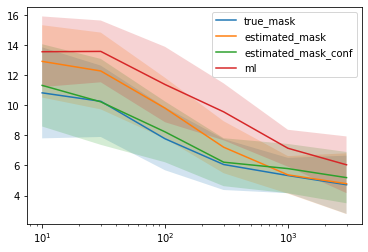

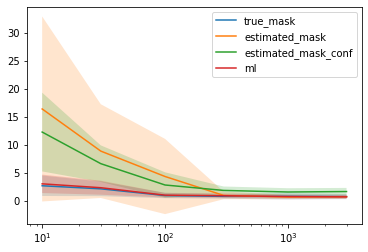

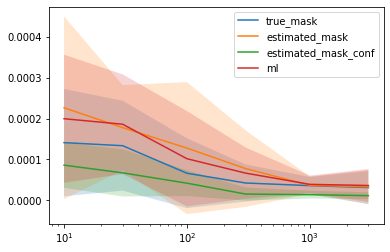

In [8]:
Ns = [10, 30, 100, 300, 1000, 3000]
algs = ['true_mask', 'estimated_mask', 'ml', \
        'ridge_0.001', 'ridge_0.01',
        'lasso_0.001', 'lasso_0.01', 
        'shannon_0.1', 'shannon_1', 'shannon_10', 'shannon_100', \
        'tsallis_0.1', 'tsallis_1', 'tsallis_10', 'tsallis_100', \
        'fe', \
        'fe_shannon_0.001','fe_shannon_0.01', 'fe_shannon_0.1', 'fe_shannon_1', \
        'fe_tsallis_0.001','fe_tsallis_0.01', 'fe_tsallis_0.1', 'fe_tsallis_1', \
        'estimated_mask_conf']

means_norm_diff, means_kl, means_fe = None, None, None
stds_norm_diff, stds_kl, stds_fe = None, None, None

plt.figure()

for N in Ns:
    paths = glob.glob('res_new_new/res_%s_*.npy' % N)
    ll_norm_diff, ll_kl, ll_fe = [], [], []
    for p in paths:
        norm_diff, kl, fe = np.load(p)
        ll_norm_diff.append(norm_diff)
        ll_kl.append(kl)
        ll_fe.append(fe)
    
    ll_norm_diff = np.array(ll_norm_diff)
    ll_kl = np.array(ll_kl)
    ll_fe = np.array(ll_fe)
    mean_norm_diff = np.mean(ll_norm_diff, axis=0)
    std_norm_diff = np.var(ll_norm_diff, axis=0) ** 0.5
    mean_kl = np.mean(ll_kl, axis=0)
    std_kl = np.var(ll_kl, axis=0) ** 0.5
    mean_fe = np.mean(ll_fe, axis=0)
    std_fe = np.var(ll_fe, axis=0) ** 0.5
    #print(mean_norm_diff)
    
    ll_norm_diff, ll_kl, ll_fe = [], [], []
    paths = glob.glob('res_new_new/res_conf_%s_*.npy' % N)
    for p in paths:
        norm_diff, kl, fe = np.load(p)
        ll_norm_diff.append(norm_diff)
        ll_kl.append(kl)
        ll_fe.append(fe)
    
    ll_norm_diff = np.array(ll_norm_diff)
    ll_kl = np.array(ll_kl)
    ll_fe = np.array(ll_fe)
    #print(np.mean(ll_norm_diff, axis=0))
    mean_norm_diff = np.concatenate([mean_norm_diff, np.mean(ll_norm_diff, axis=0)])
    std_norm_diff = np.concatenate([std_norm_diff, np.var(ll_norm_diff, axis=0) ** 0.5])
    mean_kl = np.concatenate([mean_kl, np.mean(ll_kl, axis=0)])
    std_kl = np.concatenate([std_kl, np.var(ll_kl, axis=0) ** 0.5])
    mean_fe = np.concatenate([mean_fe, np.mean(ll_fe, axis=0)])
    std_fe = np.concatenate([std_fe, np.var(ll_fe, axis=0) ** 0.5])
    
    
    if means_norm_diff is None:
        means_norm_diff = mean_norm_diff
        stds_norm_diff = std_norm_diff
        means_kl = mean_kl
        stds_kl = std_kl
        means_fe = mean_fe
        stds_fe = std_fe
    else:
        means_norm_diff = np.vstack((means_norm_diff, mean_norm_diff))
        stds_norm_diff = np.vstack((stds_norm_diff, std_norm_diff))
        means_kl = np.vstack((means_kl, mean_kl))
        stds_kl = np.vstack((stds_kl, std_kl))
        means_fe = np.vstack((means_fe, mean_fe))
        stds_fe = np.vstack((stds_fe, std_fe))

plt.figure()
indexes = [0,1, -1, 2,]
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_norm_diff[:, i], label=alg)
    plt.fill_between(Ns,  means_norm_diff[:, i] + stds_norm_diff[:, i], means_norm_diff[:, i] - stds_norm_diff[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')

plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_fe[:, i], label=alg)
    plt.fill_between(Ns,  means_fe[:, i] + stds_fe[:, i], means_fe[:, i] - stds_fe[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')


plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_kl[:, i], label=alg)
    plt.fill_between(Ns,  means_kl[:, i] + stds_kl[:, i], means_kl[:, i] - stds_kl[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')



#plt.yscale('log')
#print(means_, stds_)

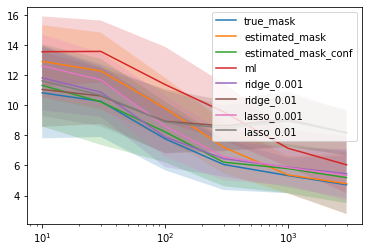

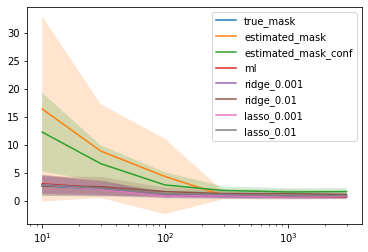

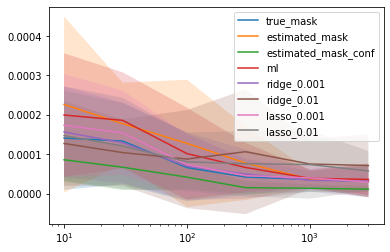

In [10]:
#Ridge and Lasso
plt.figure()
indexes = [0,1, -1, 2, 3, 4, 5, 6]
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_norm_diff[:, i], label=alg)
    plt.fill_between(Ns,  means_norm_diff[:, i] + stds_norm_diff[:, i], means_norm_diff[:, i] - stds_norm_diff[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')

plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_fe[:, i], label=alg)
    plt.fill_between(Ns,  means_fe[:, i] + stds_fe[:, i], means_fe[:, i] - stds_fe[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')


plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_kl[:, i], label=alg)
    plt.fill_between(Ns,  means_kl[:, i] + stds_kl[:, i], means_kl[:, i] - stds_kl[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')

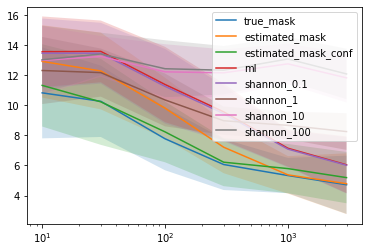

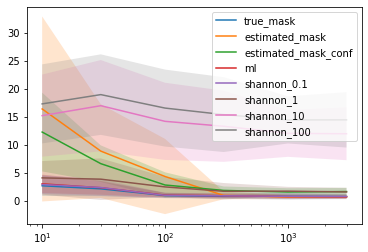

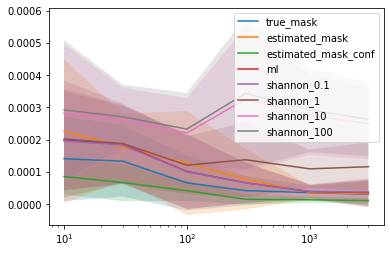

In [11]:
#Shannon
plt.figure()
indexes = [0,1, -1, 2, 7, 8, 9, 10]
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_norm_diff[:, i], label=alg)
    plt.fill_between(Ns,  means_norm_diff[:, i] + stds_norm_diff[:, i], means_norm_diff[:, i] - stds_norm_diff[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')

plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_fe[:, i], label=alg)
    plt.fill_between(Ns,  means_fe[:, i] + stds_fe[:, i], means_fe[:, i] - stds_fe[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')


plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_kl[:, i], label=alg)
    plt.fill_between(Ns,  means_kl[:, i] + stds_kl[:, i], means_kl[:, i] - stds_kl[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')

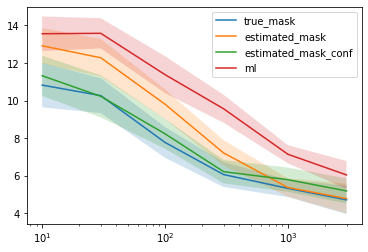

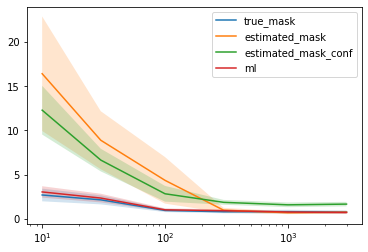

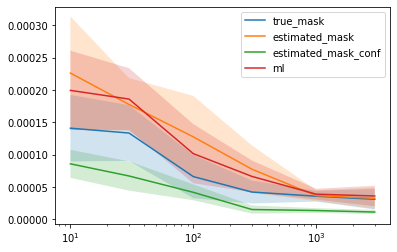

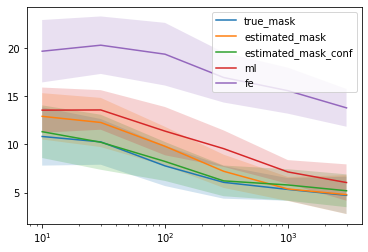

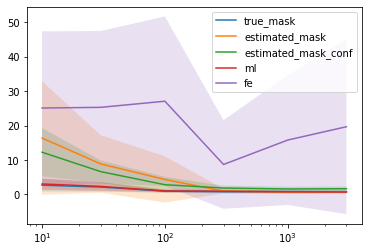

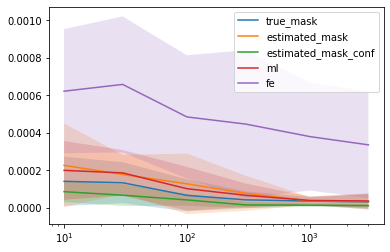

In [13]:
#Fe
plt.figure()
indexes = [0,1, -1, 2, 15]
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_norm_diff[:, i], label=alg)
    plt.fill_between(Ns,  means_norm_diff[:, i] + stds_norm_diff[:, i], means_norm_diff[:, i] - stds_norm_diff[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')

plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_fe[:, i], label=alg)
    plt.fill_between(Ns,  means_fe[:, i] + stds_fe[:, i], means_fe[:, i] - stds_fe[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')


plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_kl[:, i], label=alg)
    plt.fill_between(Ns,  means_kl[:, i] + stds_kl[:, i], means_kl[:, i] - stds_kl[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')

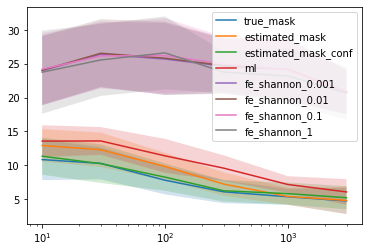

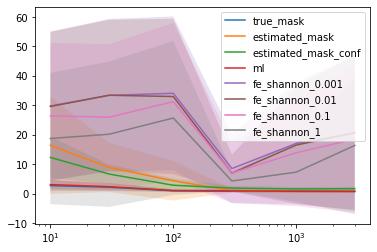

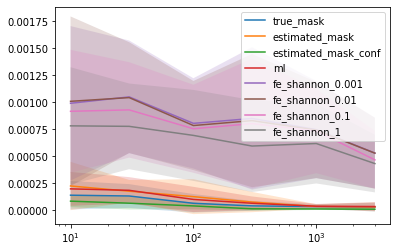

In [14]:
#FE Shannon
plt.figure()
indexes = [0,1, -1, 2, 16, 17, 18, 19]
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_norm_diff[:, i], label=alg)
    plt.fill_between(Ns,  means_norm_diff[:, i] + stds_norm_diff[:, i], means_norm_diff[:, i] - stds_norm_diff[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')

plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_fe[:, i], label=alg)
    plt.fill_between(Ns,  means_fe[:, i] + stds_fe[:, i], means_fe[:, i] - stds_fe[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')


plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_kl[:, i], label=alg)
    plt.fill_between(Ns,  means_kl[:, i] + stds_kl[:, i], means_kl[:, i] - stds_kl[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')

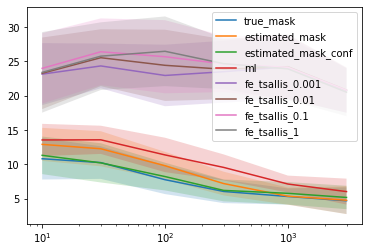

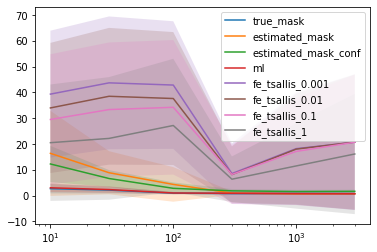

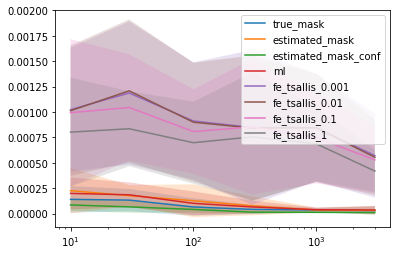

In [15]:
#FE Tsallis
plt.figure()
indexes = [0,1, -1, 2, 20, 21, 22, 23]
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_norm_diff[:, i], label=alg)
    plt.fill_between(Ns,  means_norm_diff[:, i] + stds_norm_diff[:, i], means_norm_diff[:, i] - stds_norm_diff[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')

plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_fe[:, i], label=alg)
    plt.fill_between(Ns,  means_fe[:, i] + stds_fe[:, i], means_fe[:, i] - stds_fe[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')


plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_kl[:, i], label=alg)
    plt.fill_between(Ns,  means_kl[:, i] + stds_kl[:, i], means_kl[:, i] - stds_kl[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')

46
(6, 46)


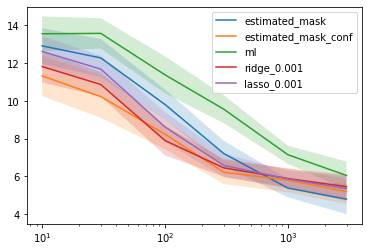

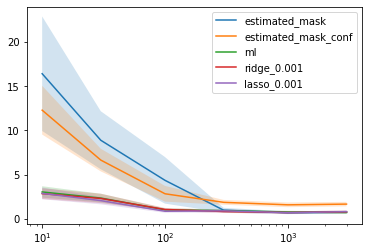

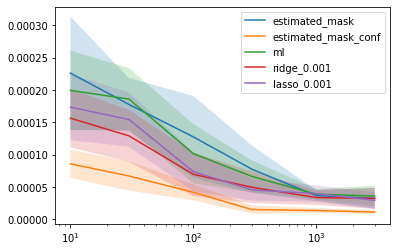

In [106]:
plt.figure()
indexes = [1, -1, 2, 3, 5]
lll = [Ns]
cols = ['N']
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_norm_diff[:, i], label=alg)
    plt.fill_between(Ns,  means_norm_diff[:, i] + 1.96 / np.sqrt(25) * stds_norm_diff[:, i], means_norm_diff[:, i] - 1.96 / np.sqrt(25) * stds_norm_diff[:, i], alpha=0.2)
    
    lll.append(means_norm_diff[:, i])
    lll.append(means_norm_diff[:, i] + 1.96 / np.sqrt(25) * stds_norm_diff[:, i])
    lll.append(means_norm_diff[:, i] - 1.96 / np.sqrt(25) * stds_norm_diff[:, i])
    cols.extend(['%s_norm_diff_mean' % alg, '%s_norm_diff_high' % alg, '%s_norm_diff_low' % alg])
    
plt.legend(loc='upper right')    
plt.xscale('log')

plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_fe[:, i], label=alg)
    plt.fill_between(Ns,  means_fe[:, i] + 1.96 / np.sqrt(25) * stds_fe[:, i], means_fe[:, i] - 1.96 / np.sqrt(25) * stds_fe[:, i], alpha=0.2)
    
    lll.append(means_fe[:, i])
    lll.append(means_fe[:, i] + 1.96 / np.sqrt(25) * stds_fe[:, i])
    lll.append(means_fe[:, i] - 1.96 / np.sqrt(25) * stds_fe[:, i])
    cols.extend(['%s_fe_mean' % alg, '%s_fe_high' % alg, '%s_fe_low' % alg])
    
plt.legend(loc='upper right')    
plt.xscale('log')


plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_kl[:, i], label=alg)
    plt.fill_between(Ns,  means_kl[:, i] + 1.96 / np.sqrt(25) * stds_kl[:, i], means_kl[:, i] - 1.96 / np.sqrt(25) * stds_kl[:, i], alpha=0.2)
    
    lll.append(means_kl[:, i])
    lll.append(means_kl[:, i] + 1.96 / np.sqrt(25) * stds_kl[:, i])
    lll.append(means_kl[:, i] - 1.96 / np.sqrt(25) * stds_kl[:, i])
    cols.extend(['%s_kl_mean' % alg, '%s_kl_high' % alg, '%s_kl_low' % alg])
    
plt.legend(loc='upper right')    
plt.xscale('log')

print(len(cols))

lll = np.array(lll).T
print(lll.shape)
np.savetxt('il_data.csv', lll, delimiter=',', header=','.join(cols))

In [89]:
from scipy.stats import t

def compute_opt(means_, stds_, confidence = .99, n  = 25):

    opt = np.zeros_like(means_, dtype=bool)

    for j, ns in enumerate(Ns):
        optimal_k = np.argmin(means_[j, :])

        m1 = means_[j, optimal_k]
        s1 = stds_[j, optimal_k]

        opt[j, optimal_k] = True

        for i in range(len(means_norm_diff[j])):
            m2 = means_[j, i]
            s2 = stds_[j, i]
            t_stat = (m2 - m1) / np.sqrt(s1 ** 2 / n + s2 ** 2 / n)
            dof = (s1 **2 / n + s2 ** 2 / n) ** 2 / (s1 ** 4 / (n ** 2 * (n - 1)) + s2 ** 4 / (n ** 2 * (n - 1)))
            dof = int(dof)
            c = t.ppf(confidence, dof)

            #print(t_stat, c)
            if t_stat < c:
                opt[j, i] = True
    return opt

In [90]:
#Table
for means_, stds_ in [(means_norm_diff, stds_norm_diff),
              (means_kl*1000, stds_kl*1000),
              (means_fe, stds_fe)]:
    opt = compute_opt(means_, stds_, confidence = .95)

    n = 25
    indexes = [0,1, -1, 2] + list(range(3, 24))
    for i in indexes:
        alg = algs[i]

        s = alg + ' & '
        for j, ns in enumerate(Ns):
            m = means_[j, i] 
            c = stds_[j, i] #1.96 / np.sqrt(n) * stds_[j, i]

            if opt[j, i]:
                s = s + ' $ \\mathbf{ %.3f \\pm %.3f } $ ' % (m, c)
            else:
                s = s + ' $%.3f \\pm %.3f$ ' % (m, c)
            if j == len(Ns) - 1:
                s = s + ' \\\\ '
            else:
                s = s + ' & '
        print(s)
    print('\n' * 3)
'''    
    plt.plot(Ns, means_norm_diff[:, i], label=alg)
    plt.fill_between(Ns,  means_norm_diff[:, i] + stds_norm_diff[:, i], means_norm_diff[:, i] - stds_norm_diff[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')

plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_fe[:, i], label=alg)
    plt.fill_between(Ns,  means_fe[:, i] + stds_fe[:, i], means_fe[:, i] - stds_fe[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')


plt.figure()
for i in indexes:
    alg = algs[i]
    plt.plot(Ns, means_kl[:, i], label=alg)
    plt.fill_between(Ns,  means_kl[:, i] + stds_kl[:, i], means_kl[:, i] - stds_kl[:, i], alpha=0.2)
    
plt.legend(loc='upper right')    
plt.xscale('log')
'''

true_mask &  $ \mathbf{ 10.826 \pm 3.026 } $  &  $ \mathbf{ 10.265 \pm 2.373 } $  &  $ \mathbf{ 7.773 \pm 2.093 } $  &  $ \mathbf{ 6.061 \pm 1.696 } $  &  $ \mathbf{ 5.328 \pm 1.175 } $  &  $ \mathbf{ 4.715 \pm 1.934 } $  \\ 
estimated_mask &  $12.918 \pm 2.405$  &  $12.280 \pm 2.554$  &  $9.808 \pm 2.022$  &  $7.212 \pm 1.729$  &  $ \mathbf{ 5.373 \pm 1.248 } $  &  $ \mathbf{ 4.785 \pm 2.022 } $  \\ 
estimated_mask_conf &  $ \mathbf{ 11.323 \pm 2.735 } $  &  $ \mathbf{ 10.227 \pm 2.857 } $  &  $ \mathbf{ 8.232 \pm 2.022 } $  &  $ \mathbf{ 6.215 \pm 1.594 } $  &  $ \mathbf{ 5.790 \pm 1.638 } $  &  $ \mathbf{ 5.189 \pm 1.705 } $  \\ 
ml &  $13.561 \pm 2.346$  &  $13.582 \pm 2.053$  &  $11.381 \pm 2.506$  &  $9.563 \pm 1.893$  &  $7.143 \pm 1.227$  &  $6.042 \pm 1.886$  \\ 
ridge_0.001 &  $ \mathbf{ 11.820 \pm 2.151 } $  &  $ \mathbf{ 10.872 \pm 1.637 } $  &  $ \mathbf{ 7.896 \pm 2.003 } $  &  $ \mathbf{ 6.448 \pm 1.200 } $  &  $ \mathbf{ 5.880 \pm 1.318 } $  &  $ \mathbf{ 5.449 \pm 1.62

"    \n    plt.plot(Ns, means_norm_diff[:, i], label=alg)\n    plt.fill_between(Ns,  means_norm_diff[:, i] + stds_norm_diff[:, i], means_norm_diff[:, i] - stds_norm_diff[:, i], alpha=0.2)\n    \nplt.legend(loc='upper right')    \nplt.xscale('log')\n\nplt.figure()\nfor i in indexes:\n    alg = algs[i]\n    plt.plot(Ns, means_fe[:, i], label=alg)\n    plt.fill_between(Ns,  means_fe[:, i] + stds_fe[:, i], means_fe[:, i] - stds_fe[:, i], alpha=0.2)\n    \nplt.legend(loc='upper right')    \nplt.xscale('log')\n\n\nplt.figure()\nfor i in indexes:\n    alg = algs[i]\n    plt.plot(Ns, means_kl[:, i], label=alg)\n    plt.fill_between(Ns,  means_kl[:, i] + stds_kl[:, i], means_kl[:, i] - stds_kl[:, i], alpha=0.2)\n    \nplt.legend(loc='upper right')    \nplt.xscale('log')\n"